# Summary Statistics

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [4]:
arr = np.array([[1, 2, np.nan], [np.nan, 3, 4]])
arr

array([[  1.,   2.,  nan],
       [ nan,   3.,   4.]])

In [6]:
dframe1 = DataFrame(arr, index=list('AB'), columns=['One', 'Two', 'Three'])
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


以下方法預設axis為0(index)，都可以改成axis=1(column)

In [14]:
# Sum
dframe1.sum()

One      1.0
Two      5.0
Three    4.0
dtype: float64

In [8]:
# Sum with axis
dframe1.sum(axis=1)

A    3.0
B    7.0
dtype: float64

In [11]:
# Min
dframe1.min()

One      1.0
Two      2.0
Three    4.0
dtype: float64

In [12]:
# Min with axis
dframe1.min(axis=1)

A    1.0
B    3.0
dtype: float64

In [18]:
# 找出各column擁有最小值的index
dframe1.idxmin()

One      A
Two      A
Three    B
dtype: object

In [19]:
# 找出各column擁有最大值的index
dframe1.idxmax()

One      A
Two      B
Three    B
dtype: object

In [21]:
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [20]:
# 累加的sum
dframe1.cumsum()

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,5.0,4.0


In [28]:
# DataFrame的統計資訊
dframe1.describe()

,One,Two,Three
count,1.0,2.000000,1.0
mean,1.0,2.500000,4.0
std,NaN,0.707107,NaN
min,1.0,2.000000,4.0
25%,1.0,2.250000,4.0
50%,1.0,2.500000,4.0
75%,1.0,2.750000,4.0
max,1.0,3.000000,4.0


In [31]:
dframe1.describe()['One']

count    1.0
mean     1.0
std      NaN
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: One, dtype: float64

In [29]:
dframe1.describe().ix['25%']

One      1.00
Two      2.25
Three    4.00
Name: 25%, dtype: float64

In [34]:
# Review statistics
# 搞懂Covariance / Correlation
# 延伸: z-score, Linear Regression
from IPython.display import YouTubeVideo

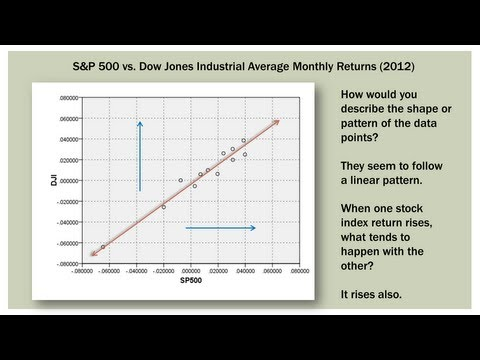

In [35]:
# Understanding Covariance
YouTubeVideo('xGbpuFNR1ME')

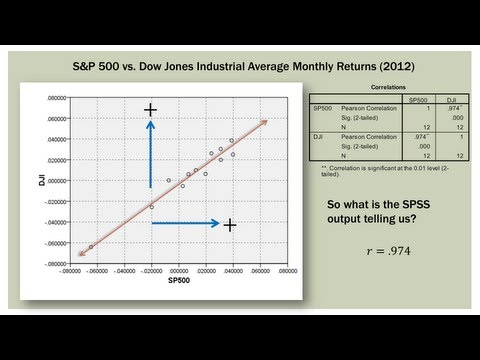

In [36]:
# Understanding Correlation
YouTubeVideo('4EXNedimDMs')

In [40]:
# pip install pandas-datareader
from pandas_datareader import data
import datetime

In [42]:
# 只是取得資料，不用care用法
prices = data.get_data_yahoo(['CVX', 'XOM', 'BP'],
                             start=datetime.datetime(2010, 1, 1),
                             end=datetime.datetime(2013, 1, 1))['Adj Close']
prices.head()

,BP,CVX,XOM
Date,,,
2010-01-04,43.016566,61.805127,57.203028
2010-01-05,43.322008,62.242911,57.426378
2010-01-06,43.547455,62.250724,57.922715
2010-01-07,43.532910,62.016202,57.740730
2010-01-08,43.634723,62.125647,57.509100


In [43]:
volume = data.get_data_yahoo(['CVX', 'XOM', 'BP'],
                             start=datetime.datetime(2010, 1, 1),
                             end=datetime.datetime(2013, 1, 1))['Volume']
volume.head()

,BP,CVX,XOM
Date,,,
2010-01-04,3956100.0,10173800.0,27809100.0
2010-01-05,4109600.0,10593700.0,30174700.0
2010-01-06,6227900.0,11014600.0,35044700.0
2010-01-07,4431300.0,9626900.0,27192100.0
2010-01-08,3786100.0,5624300.0,24891800.0


In [50]:
# DataFrame: Percent change over given number of periods (default=1).
rets = prices.pct_change()

In [51]:
rets.head()

,BP,CVX,XOM
Date,,,
2010-01-04,NaN,NaN,NaN
2010-01-05,0.007101,0.007083,0.003905
2010-01-06,0.005204,0.000126,0.008643
2010-01-07,-0.000334,-0.003767,-0.003142
2010-01-08,0.002339,0.001765,-0.004012


In [61]:
# Correlation of the dataframe (stocks)
corr = rets.corr()

In [62]:
corr

,BP,CVX,XOM
BP,1.000000,0.589024,0.617390
CVX,0.589024,1.000000,0.854781
XOM,0.617390,0.854781,1.000000


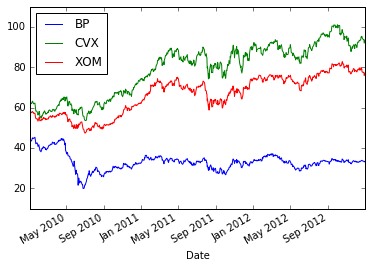

In [66]:
%matplotlib inline
prices.plot()

# 可以看出CVS跟XOM有很強的關聯

In [70]:
# pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

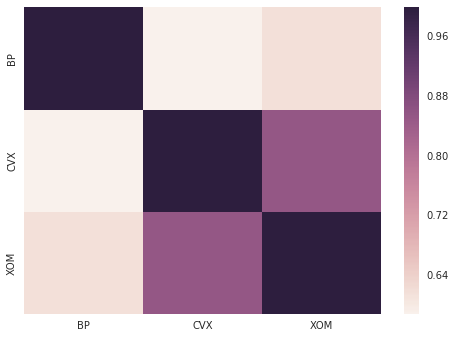

In [76]:
# 只是preview，之後會再看seaborn更詳細的用法
sns.heatmap(rets.corr())

In [80]:
ser1 = Series(['w','w','x', 'y', 'z' ,'w' ,'w' ,'x' ,'x' ,'y' ,'a' ,'z'])
ser1

0     w
1     w
2     x
3     y
4     z
5     w
6     w
7     x
8     x
9     y
10    a
11    z
dtype: object

In [81]:
# Unique
ser1.unique()

array(['w', 'x', 'y', 'z', 'a'], dtype=object)

In [82]:
# Value counts
ser1.value_counts()

w    4
x    3
z    2
y    2
a    1
dtype: int64